# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
crypto_data = {"crypto_shares":[1.2,5.3]}
crypto = ["BTC", "ETH"]
df_crypto_shares = pd.DataFrame(crypto_data, index=crypto)
df_crypto_shares


,crypto_shares
BTC,1.2
ETH,5.3


In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=json"

In [6]:
# Fetch current BTC price
#btc_response = requests.get(btc_url)
#print(btc_data)
#btc_content = btc_data.content

#BTC = btc_data.json()

#import json

# Use json.dumps with argument indent=4 to format data
#print(json.dumps(data, indent=4))

In [7]:
# Fetch current ETH price
#eth_data = requests.get(eth_url)
#print(eth_data)
#eth_content = eth_data.content
#ETH = eth_data.json()
#import json

# Use json.dumps with argument indent=4 to format data
#print(json.dumps(data, indent=4))


In [8]:
btc_response = requests.get(btc_url)
eth_response = requests.get(eth_url)

In [9]:
btc_data = btc_response.json()
eth_data = eth_response.json()
#print(btc_data)
#print(eth_data)

In [10]:
# Display btc key path to get current price
btc_data['data']['1']['quotes']['USD'].keys()


dict_keys(['price', 'volume_24h', 'market_cap', 'percentage_change_1h', 'percentage_change_24h', 'percentage_change_7d', 'percent_change_1h', 'percent_change_24h', 'percent_change_7d'])

In [11]:
# Display eth key path to get current price
eth_data['data']['1027']['quotes']['USD'].keys()

dict_keys(['price', 'volume_24h', 'market_cap', 'percentage_change_1h', 'percentage_change_24h', 'percentage_change_7d', 'percent_change_1h', 'percent_change_24h', 'percent_change_7d'])

In [12]:
# Select BTC price
btc_price = btc_data['data']['1']['quotes']['USD']['price']
btc_price

33281.0

In [13]:
# Select ETH price
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_price

2045.57

In [14]:
# Compute current value of BTC and ETH:

btc_value = btc_price * df_crypto_shares.loc["BTC"]["crypto_shares"]
eth_value = eth_price * df_crypto_shares.loc["ETH"]["crypto_shares"]

my_btc='1.2'
my_eth='5.3'

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")


The current value of your 1.2 BTC is $39937.20
The current value of your 5.3 ETH is $10841.52


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [15]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#verify that the Alpaca and secret were correctly loaded:

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [16]:
# Current amount of shares
shares_data = {"shares":[50,200]}

# Set the tickers
tickers = ["AGG", "SPY"]

# create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares


,shares
AGG,50
SPY,200


In [17]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()


# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(tickers, timeframe, start = today, end = today).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high     low    close   volume   open   
time                                                                         
2020-07-14 00:00:00-04:00  118.58  118.74  118.58  118.655  3611959  313.3   

                                                          
                             high  low   close    volume  
time                                                      
2020-07-14 00:00:00-04:00  319.76  312  318.89  79292036

In [18]:
# Pick AGG and SPY close prices
AGG_close_price = float(df_portfolio["AGG"]["close"])
SPY_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_close_price}")
print(f"Current SPY closing price: ${SPY_close_price}")

Current AGG closing price: $118.655
Current SPY closing price: $318.89


In [19]:
# Compute the current value of shares
AGG_value = AGG_close_price * df_shares.loc["AGG"]["shares"]
SPY_value = SPY_close_price * df_shares.loc["SPY"]["shares"]

# Print current value of share
print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${AGG_value:0.2f}")

print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${SPY_value:0.2f}")

The current value of the 50 AGG shares is $5932.75
The current value of the 200 SPY shares is $63778.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthy_income = int(12000)

# total value of crypto:
crypto_value = (btc_price * df_crypto_shares.loc["BTC"]["crypto_shares"])+ (eth_price * df_crypto_shares.loc["ETH"]["crypto_shares"])
print(crypto_value)

# total value of shares:
share_value = SPY_value + AGG_value
print(share_value)

# Create savings DataFrame

investments = ["crypto","shares"]
portfolio_data = {"amount": [crypto_value, share_value]}


df_savings = pd.DataFrame(portfolio_data, index=investments)

# Display savings DataFrame
display(df_savings)

50778.721
69710.75


,amount
crypto,50778.721
shares,69710.750


<AxesSubplot:title={'center':'Savings Portfolio'}, ylabel='amount'>

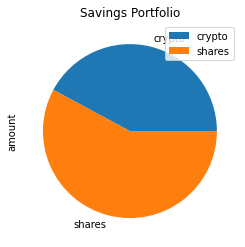

In [21]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings Portfolio")

In [22]:
# Set ideal emergency fund
income = int(12000)
emergency_fund = income * 3
emergency_fund
# Calculate total amount of savings
total_savings = crypto_value + share_value
total_savings

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations your savings of ${(total_savings):0.2f} are ${(total_savings-emergency_fund):0.2f} over your emergency fund.")
elif total_savings == emergency_fund:
        print("Your current savings meets the minimum recommended amount of ${emergency_fund:0.2f}.")
else:
            print("Your current savings are ${(emergency_fund - total_savings):0.2f} less the the recommended amount.")




Congratulations your savings of $120489.47 are $84489.47 over your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-07-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-12', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(tickers, timeframe, start = '2016-07-12', end = '2021-07-12').df

# Display sample data
df_stock_data.head()

AGG                                       \
                               open      high       low   close   volume   
time                                                                       
2021-02-18 00:00:00-05:00  116.1400  116.2800  116.0300  116.20  3910324   
2021-02-19 00:00:00-05:00  116.0187  116.0600  115.7515  115.83  4416681   
2021-02-22 00:00:00-05:00  115.7600  115.8662  115.4800  115.49  4704520   
2021-02-23 00:00:00-05:00  115.7500  115.7500  115.2700  115.52  5373535   
2021-02-24 00:00:00-05:00  115.0600  115.5000  115.0100  115.47  6131453   

                              SPY                                     
                             open     high     low   close    volume  
time                                                                  
2021-02-18 00:00:00-05:00  389.59  391.515  387.74  390.75  52370380  
2021-02-19 00:00:00-05:00  392.07  392.380  389.55  390.02  66794115  
2021-02-22 00:00:00-05:00  387.06  389.620  386.74  387.11  56604869  
2021-02-23 00:00:00-05:00  384.66  388.945  380.20  387.50  98333278  
2021-02-24 00:00:00-05:00  386.33  392.230  385.27  391.76  64527459

In [27]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_4060_port = MCSimulation(
    portfolio_data = df_stock_data, weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [29]:
# Printing the simulation input data
MC_4060_port.portfolio_data.head()

AGG                                       \
                               open      high       low   close   volume   
time                                                                       
2021-02-18 00:00:00-05:00  116.1400  116.2800  116.0300  116.20  3910324   
2021-02-19 00:00:00-05:00  116.0187  116.0600  115.7515  115.83  4416681   
2021-02-22 00:00:00-05:00  115.7600  115.8662  115.4800  115.49  4704520   
2021-02-23 00:00:00-05:00  115.7500  115.7500  115.2700  115.52  5373535   
2021-02-24 00:00:00-05:00  115.0600  115.5000  115.0100  115.47  6131453   

                                           SPY                           \
                          daily_return    open     high     low   close   
time                                                                      
2021-02-18 00:00:00-05:00          NaN  389.59  391.515  387.74  390.75   
2021-02-19 00:00:00-05:00    -0.003184  392.07  392.380  389.55  390.02   
2021-02-22 00:00:00-05:00    -0.002935  387.06  389.620  386.74  387.11   
2021-02-23 00:00:00-05:00     0.000260  384.66  388.945  380.20  387.50   
2021-02-24 00:00:00-05:00    -0.000433  386.33  392.230  385.27  391.76   

                                                  
                             volume daily_return  
time                                              
2021-02-18 00:00:00-05:00  52370380          NaN  
2021-02-19 00:00:00-05:00  66794115    -0.001868  
2021-02-22 00:00:00-05:00  56604869    -0.007461  
2021-02-23 00:00:00-05:00  98333278     0.001007  
2021-02-24 00:00:00-05:00  64527459     0.010994

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_4060_port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006171,1.010973,1.000180,1.002484,0.995793,1.006873,0.996062,1.002348,1.006983,1.001012,...,1.009202,0.996783,0.997773,0.997380,0.996930,0.998584,0.999902,1.004761,1.000539,0.990448
2,1.013519,1.018927,1.013978,1.001938,1.001955,0.999864,0.989950,0.995689,1.003111,0.997474,...,1.014447,0.995821,0.993736,0.994597,0.994876,1.001985,1.010069,1.008640,1.009538,0.976303
3,1.009030,1.013402,1.012059,0.999883,1.003759,0.997611,0.993836,1.000238,1.007261,0.995657,...,1.021933,0.992895,0.981690,1.002476,1.000749,1.009369,1.006109,1.004591,1.018934,0.981138
4,1.005971,1.024324,1.018971,1.000060,0.990810,0.994771,0.989882,0.996897,1.008927,0.993108,...,1.021710,0.992171,0.981117,1.008641,1.002749,1.006608,1.011805,1.011147,1.017706,0.979340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,239.019002,112.230252,177.035072,163.481127,100.264847,98.956469,180.429350,286.161517,137.228322,161.620184,...,87.425867,220.571920,423.270398,99.579600,232.618323,189.491778,185.171057,178.274794,98.181329,278.236390
7557,239.770437,112.566270,176.485949,164.854163,100.118777,99.090693,182.039765,289.442256,137.020952,160.903040,...,87.447736,218.573389,423.643863,98.842803,232.798869,191.472734,184.761776,177.973182,98.407977,278.823991
7558,239.901513,114.086795,175.975191,164.544950,100.550957,98.161205,181.357185,291.516613,135.992418,160.434235,...,87.867867,219.714330,421.629177,98.536534,234.117842,192.501635,184.164828,177.755550,97.758333,277.509978
7559,241.545680,114.747753,176.184821,163.674735,101.306070,97.805484,181.408324,292.069881,137.325141,160.607009,...,89.022458,218.200089,421.868630,98.903491,234.033246,192.724231,183.893044,176.942140,98.710340,278.905831


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

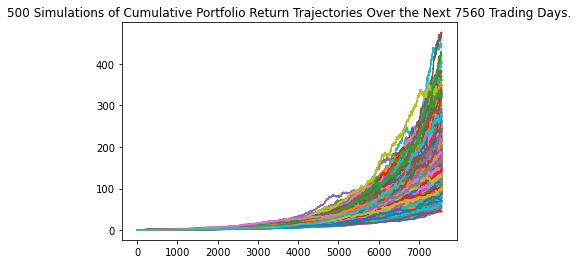

In [42]:
# Plot simulation outcomes
MC_4060_port.plot_simulation()
#MC_4060_port.plot(title="Simulated Daily Returns Behavior of Savings Portfolio")

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

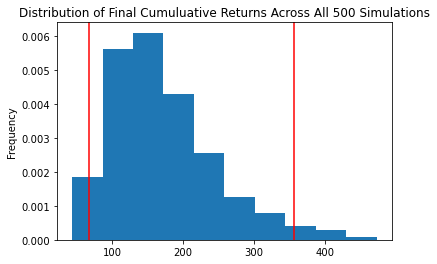

In [43]:
# Plot probability distribution and confidence intervals
MC_4060_port.plot_distribution()

### Retirement Analysis

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_4060_port.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean            171.027438
std              75.171111
min              43.271052
25%             118.078082
50%             156.253762
75%             204.024223
max             472.550085
95% CI Lower     67.698209
95% CI Upper    356.517436
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1353964.17 and $7130348.71


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [48]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $2030946.26 and $10695523.07


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_4060_5_port = MCSimulation(
    portfolio_data = df_stock_data, weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [51]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_4060_5_port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004718,0.999551,0.996876,1.002428,0.997682,0.990850,0.996883,1.005393,1.002692,1.006698,...,0.988916,1.005153,1.005507,0.999050,0.996687,0.995552,1.000841,1.003177,0.998631,1.000075
2,1.010915,0.995046,1.000086,0.992722,1.001515,0.987802,0.992988,1.005016,1.001270,1.010549,...,0.989414,1.006906,1.017631,1.004852,0.993388,0.998164,1.004796,0.997629,0.999870,1.002180
3,1.011826,1.007248,1.004780,0.992211,1.000261,0.984534,0.990763,1.015567,0.996169,1.016438,...,0.984656,0.993822,1.021637,1.014236,0.998331,0.998229,1.005395,1.003622,0.996720,1.006082
4,1.008627,1.009625,1.009906,0.991671,1.017023,0.984070,0.993608,1.012270,1.006788,1.025109,...,0.978173,0.994573,1.019149,1.014630,0.999225,1.000718,1.000234,1.002073,0.998376,1.003219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.865766,2.211303,2.264999,2.244076,1.876684,2.311520,2.762707,2.881683,2.617086,2.575170,...,2.170259,2.095039,3.124765,3.257761,2.139606,1.498500,1.596155,2.445036,2.572405,3.057570
1257,2.882266,2.212191,2.274761,2.259063,1.881563,2.307075,2.747139,2.882621,2.621629,2.578302,...,2.166315,2.095659,3.126487,3.279590,2.134399,1.507889,1.603861,2.455098,2.576321,3.061521
1258,2.890844,2.239365,2.266875,2.256935,1.889221,2.290095,2.730491,2.906216,2.628350,2.576842,...,2.171910,2.088071,3.125658,3.274061,2.135187,1.507005,1.617266,2.439597,2.570318,3.059714
1259,2.903562,2.220471,2.262289,2.253813,1.904127,2.300545,2.755616,2.889737,2.628706,2.567802,...,2.180589,2.096103,3.134982,3.292910,2.142826,1.514400,1.598164,2.427967,2.578925,3.042824


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

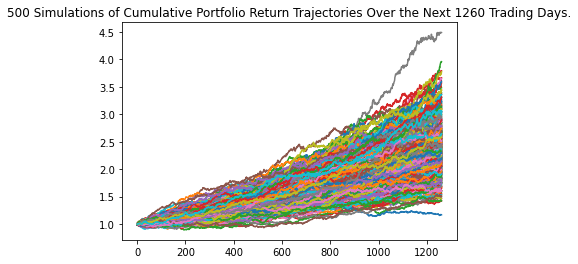

In [52]:
# Plot simulation outcomes
MC_4060_5_port.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

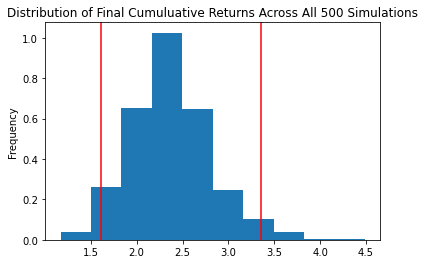

In [55]:
# Plot probability distribution and confidence intervals
MC_4060_5_port.plot_distribution()

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_4060_5_port.summarize_cumulative_return()


count           500.000000
mean              2.378596
std               0.441666
min               1.169900
25%               2.098189
50%               2.349863
75%               2.632627
max               4.487607
95% CI Lower      1.606374
95% CI Upper      3.359876
Name: 1260, dtype: float64

In [60]:
# Set initial investment
investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $4061892.52 and $21391046.14


### Ten Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

MC_4060_10_port = MCSimulation(
    portfolio_data = df_stock_data, weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [65]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_4060_10_port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006994,1.007705,0.999641,0.996899,0.991215,1.000772,0.998397,1.001943,0.999770,0.999514,...,0.997780,0.993488,1.002908,0.997009,1.005587,1.002462,1.006603,0.994768,0.993663,0.995289
2,1.002428,1.002924,1.000397,0.991865,0.993104,1.008888,0.996435,1.003138,1.004049,1.007753,...,1.003073,0.998443,1.007452,0.994549,1.000294,1.001750,1.012850,0.993046,0.991413,0.989716
3,1.009991,1.003146,1.000938,0.994495,0.994750,1.011297,1.006168,1.004318,1.000656,1.005615,...,1.009777,0.996039,1.010281,1.003054,1.000695,0.999937,1.011845,0.999505,0.991297,0.999859
4,1.005607,1.009800,1.005850,1.008842,1.000257,1.014936,1.014045,1.005746,1.005189,1.000697,...,1.014071,0.995605,1.014912,1.012102,0.995052,0.988110,1.003013,1.004267,0.988303,0.996397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.654333,4.849407,3.019031,6.131329,3.576815,7.199271,3.384049,5.013715,6.649812,5.479572,...,4.689593,4.845054,3.754488,4.435250,7.941288,3.879877,3.633679,3.769091,5.471525,4.339946
2517,4.696217,4.892296,3.050903,6.127436,3.599560,7.155956,3.393436,5.009118,6.678278,5.496916,...,4.691028,4.858218,3.748930,4.412015,7.876088,3.910783,3.636365,3.743299,5.452854,4.388965
2518,4.705126,4.890777,3.027232,6.179923,3.621429,7.096346,3.373649,4.999441,6.625273,5.450970,...,4.671782,4.803541,3.765789,4.444095,7.888568,3.916402,3.649077,3.776281,5.481698,4.375901
2519,4.684603,4.935035,3.020833,6.202631,3.632643,7.017425,3.363211,5.024284,6.645877,5.471369,...,4.725244,4.821340,3.755436,4.454282,7.861707,3.899960,3.634610,3.741344,5.488346,4.385904


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

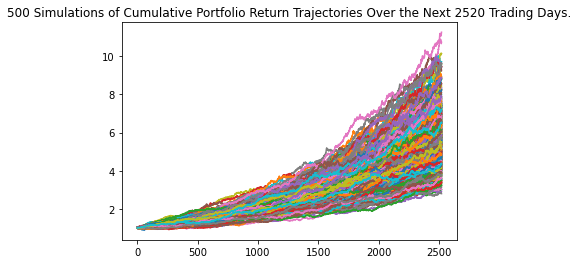

In [66]:
# Plot simulation outcomes
MC_4060_10_port.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

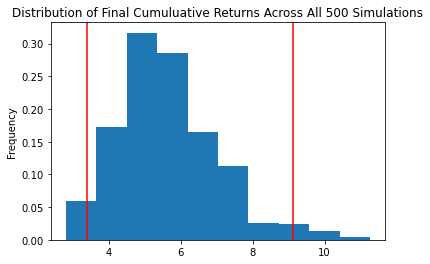

In [68]:
# Plot probability distribution and confidence intervals
MC_4060_10_port.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_4060_10_port.summarize_cumulative_return()


count           500.000000
mean              5.639188
std               1.395259
min               2.798729
25%               4.687419
50%               5.486109
75%               6.494974
max              11.264353
95% CI Lower      3.390695
95% CI Upper      9.105087
Name: 2520, dtype: float64

In [70]:
# Set initial investment
investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the 
#possible outcomes of our $60,000

ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $4061892.52 and $21391046.14
